In [1]:
pip install pandas numpy scikit-learn


Logistic Regression - Training MSE: 0.4628643440790276, Accuracy: 53.71%, F1: 0.38
Logistic Regression - Validation MSE: 0.4655270655270655, Accuracy: 53.45%, F1: 0.37
Logistic Regression - Test MSE: 0.4569884828664866, Accuracy: 54.30%, F1: 0.38


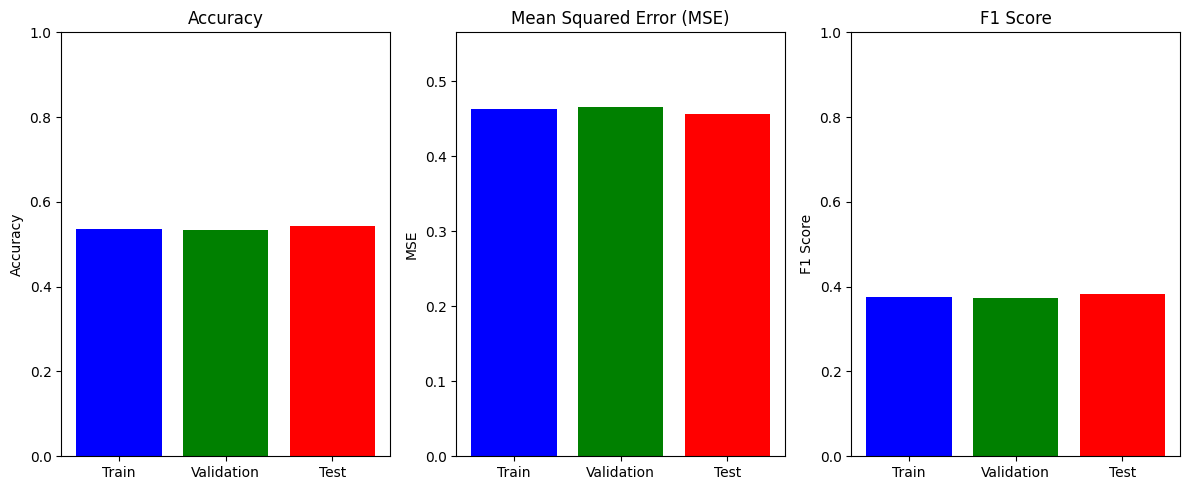

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
import matplotlib.pyplot as plt

# Load positive and negative words from text files
with open(r'/content/drive/MyDrive/pos.txt', 'r', encoding='utf-8') as pos_file:
    positive_words = [line.strip() for line in pos_file if line.strip()]

with open(r'/content/drive/MyDrive/neg.txt', 'r', encoding='utf-8') as neg_file:
    negative_words = [line.strip() for line in neg_file if line.strip()]

# Load the dataset
train_df = pd.read_csv(r'/content/drive/MyDrive/Sentiment_train.csv', encoding='utf-8')
valid_df = pd.read_csv(r'/content/drive/MyDrive/Sentiment_valid .csv', encoding='utf-8')
test_df = pd.read_csv(r'/content/drive/MyDrive/Sentiment_test.csv', encoding='utf-8')

# Function to calculate relative frequencies of positive and negative words
def calculate_relative_frequencies(sentence, positive_words, negative_words):
    words = sentence.lower().split()
    f_positive = sum(1 for word in words if word in positive_words)
    f_negative = sum(1 for word in words if word in negative_words)

    total_positive = len(positive_words)
    total_negative = len(negative_words)

    rf_positive = f_positive / total_positive if total_positive > 0 else 0
    rf_negative = f_negative / total_negative if total_negative > 0 else 0

    return rf_positive, rf_negative

# Apply the function to create features for each sentence in the datasets
train_df['RF_positive'], train_df['RF_negative'] = zip(*train_df['Sentence'].apply(
    lambda x: calculate_relative_frequencies(x, positive_words, negative_words)
))
valid_df['RF_positive'], valid_df['RF_negative'] = zip(*valid_df['Sentence'].apply(
    lambda x: calculate_relative_frequencies(x, positive_words, negative_words)
))
test_df['RF_positive'], test_df['RF_negative'] = zip(*test_df['Sentence'].apply(
    lambda x: calculate_relative_frequencies(x, positive_words, negative_words)
))

# Mapping dictionary for sentiment labels
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

# Apply mapping to target columns
y_train = train_df['Sentiment'].map(sentiment_mapping)
y_valid = valid_df['Sentiment'].map(sentiment_mapping)
y_test = test_df['Sentiment'].map(sentiment_mapping)

# Standardize the Sentiment column values
def standardize_sentiment_labels(df):
    df['Sentiment'] = df['Sentiment'].replace({'neg': 'negative', 'pos': 'positive'})
    return df

# Apply the standardization to all datasets
train_df = standardize_sentiment_labels(train_df)
valid_df = standardize_sentiment_labels(valid_df)
test_df = standardize_sentiment_labels(test_df)

# Re-map the Sentiment column to numerical values
y_train = train_df['Sentiment'].map(sentiment_mapping)
y_valid = valid_df['Sentiment'].map(sentiment_mapping)
y_test = test_df['Sentiment'].map(sentiment_mapping)

# Drop rows with NaN in target after mapping
train_df = train_df[y_train.notna()]
valid_df = valid_df[y_valid.notna()]
test_df = test_df[y_test.notna()]

# Re-apply mapping after dropping rows
y_train = train_df['Sentiment'].map(sentiment_mapping)
y_valid = valid_df['Sentiment'].map(sentiment_mapping)
y_test = test_df['Sentiment'].map(sentiment_mapping)

# Prepare feature matrix X and target vector y
X_train = train_df[['RF_positive', 'RF_negative']]
X_valid = valid_df[['RF_positive', 'RF_negative']]
X_test = test_df[['RF_positive', 'RF_negative']]

# Ensure there are multiple classes in the training set
assert len(y_train.unique()) > 1, "Training set must contain at least 2 different classes."

# Train logistic regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_train_pred = log_reg_model.predict(X_train)
y_valid_pred = log_reg_model.predict(X_valid)
y_test_pred = log_reg_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# F1 scores
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
valid_f1 = f1_score(y_valid, y_valid_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print evaluation metrics
print(f'Logistic Regression - Training MSE: {train_mse}, Accuracy: {train_accuracy * 100:.2f}%, F1: {train_f1:.2f}')
print(f'Logistic Regression - Validation MSE: {valid_mse}, Accuracy: {valid_accuracy * 100:.2f}%, F1: {valid_f1:.2f}')
print(f'Logistic Regression - Test MSE: {test_mse}, Accuracy: {test_accuracy * 100:.2f}%, F1: {test_f1:.2f}')

# Plotting
labels = ['Train', 'Validation', 'Test']

# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(labels, [train_accuracy, valid_accuracy, test_accuracy], color=['blue', 'green', 'red'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# MSE plot
plt.subplot(1, 3, 2)
plt.bar(labels, [train_mse, valid_mse, test_mse], color=['blue', 'green', 'red'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(train_mse, valid_mse, test_mse) + 0.1)

# F1 Score plot
plt.subplot(1, 3, 3)
plt.bar(labels, [train_f1, valid_f1, test_f1], color=['blue', 'green', 'red'])
plt.title('F1 Score')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

# Display all plots
plt.tight_layout()
plt.show()


SVM - Training MSE: 0.4514411154924997, Accuracy: 60.78%, F1: 0.59
SVM - Validation MSE: 0.4393162393162393, Accuracy: 61.28%, F1: 0.59
SVM - Test MSE: 0.450732262192521, Accuracy: 60.64%, F1: 0.58


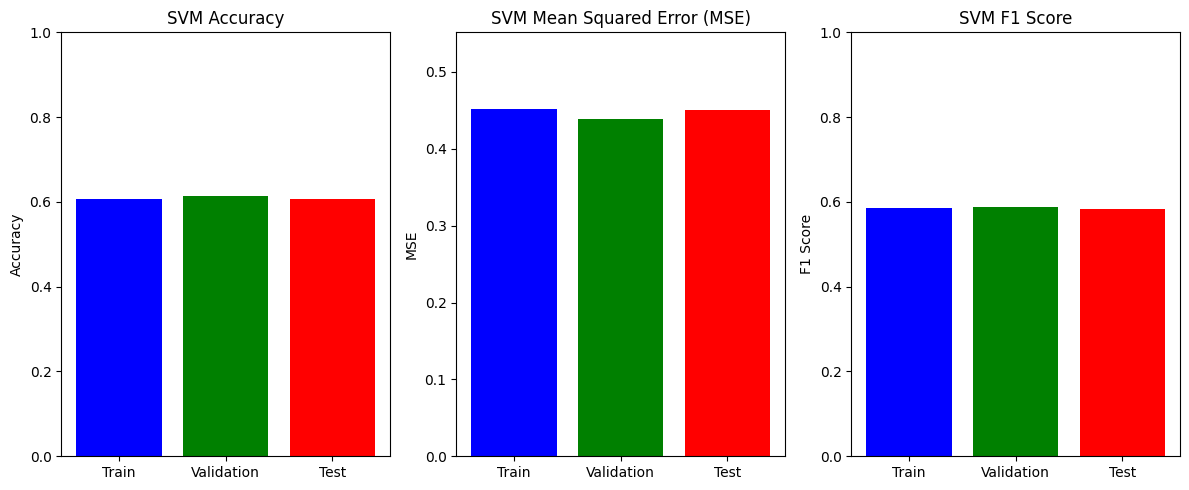

In [12]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score

# Train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions for SVM
y_train_pred_svm = svm_model.predict(X_train)
y_valid_pred_svm = svm_model.predict(X_valid)
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
valid_accuracy_svm = accuracy_score(y_valid, y_valid_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

train_mse_svm = mean_squared_error(y_train, y_train_pred_svm)
valid_mse_svm = mean_squared_error(y_valid, y_valid_pred_svm)
test_mse_svm = mean_squared_error(y_test, y_test_pred_svm)

# F1 scores
train_f1_svm = f1_score(y_train, y_train_pred_svm, average='weighted')
valid_f1_svm = f1_score(y_valid, y_valid_pred_svm, average='weighted')
test_f1_svm = f1_score(y_test, y_test_pred_svm, average='weighted')

# Print evaluation metrics for SVM
print(f'SVM - Training MSE: {train_mse_svm}, Accuracy: {train_accuracy_svm * 100:.2f}%, F1: {train_f1_svm:.2f}')
print(f'SVM - Validation MSE: {valid_mse_svm}, Accuracy: {valid_accuracy_svm * 100:.2f}%, F1: {valid_f1_svm:.2f}')
print(f'SVM - Test MSE: {test_mse_svm}, Accuracy: {test_accuracy_svm * 100:.2f}%, F1: {test_f1_svm:.2f}')

# Plotting SVM metrics
labels = ['Train', 'Validation', 'Test']

# Accuracy plot for SVM
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(labels, [train_accuracy_svm, valid_accuracy_svm, test_accuracy_svm], color=['blue', 'green', 'red'])
plt.title('SVM Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# MSE plot for SVM
plt.subplot(1, 3, 2)
plt.bar(labels, [train_mse_svm, valid_mse_svm, test_mse_svm], color=['blue', 'green', 'red'])
plt.title('SVM Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(train_mse_svm, valid_mse_svm, test_mse_svm) + 0.1)

# F1 Score plot for SVM
plt.subplot(1, 3, 3)
plt.bar(labels, [train_f1_svm, valid_f1_svm, test_f1_svm], color=['blue', 'green', 'red'])
plt.title('SVM F1 Score')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

# Display all plots
plt.tight_layout()
plt.show()


Naive Bayes - Training MSE: 0.45351437050286597, Accuracy: 58.60%, F1: 0.54
Naive Bayes - Validation MSE: 0.45071225071225074, Accuracy: 58.86%, F1: 0.54
Naive Bayes - Test MSE: 0.44276979951656475, Accuracy: 59.43%, F1: 0.55


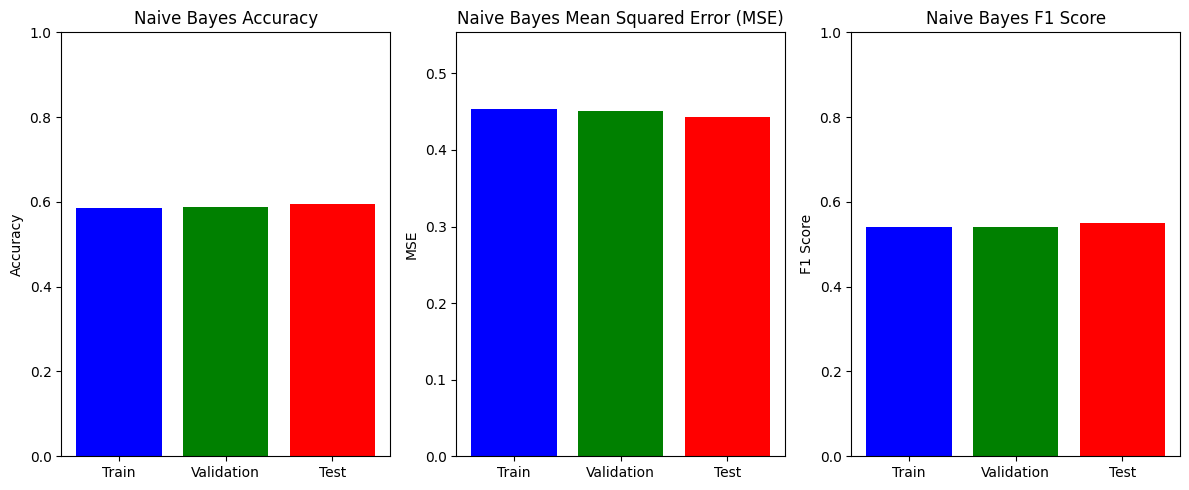

In [13]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions for Naive Bayes
y_train_pred_nb = nb_model.predict(X_train)
y_valid_pred_nb = nb_model.predict(X_valid)
y_test_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
valid_accuracy_nb = accuracy_score(y_valid, y_valid_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

train_mse_nb = mean_squared_error(y_train, y_train_pred_nb)
valid_mse_nb = mean_squared_error(y_valid, y_valid_pred_nb)
test_mse_nb = mean_squared_error(y_test, y_test_pred_nb)

# F1 scores for Naive Bayes
train_f1_nb = f1_score(y_train, y_train_pred_nb, average='weighted')
valid_f1_nb = f1_score(y_valid, y_valid_pred_nb, average='weighted')
test_f1_nb = f1_score(y_test, y_test_pred_nb, average='weighted')

# Print evaluation metrics for Naive Bayes
print(f'Naive Bayes - Training MSE: {train_mse_nb}, Accuracy: {train_accuracy_nb * 100:.2f}%, F1: {train_f1_nb:.2f}')
print(f'Naive Bayes - Validation MSE: {valid_mse_nb}, Accuracy: {valid_accuracy_nb * 100:.2f}%, F1: {valid_f1_nb:.2f}')
print(f'Naive Bayes - Test MSE: {test_mse_nb}, Accuracy: {test_accuracy_nb * 100:.2f}%, F1: {test_f1_nb:.2f}')

# Plotting Naive Bayes metrics
labels = ['Train', 'Validation', 'Test']

# Accuracy plot for Naive Bayes
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(labels, [train_accuracy_nb, valid_accuracy_nb, test_accuracy_nb], color=['blue', 'green', 'red'])
plt.title('Naive Bayes Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# MSE plot for Naive Bayes
plt.subplot(1, 3, 2)
plt.bar(labels, [train_mse_nb, valid_mse_nb, test_mse_nb], color=['blue', 'green', 'red'])
plt.title('Naive Bayes Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(train_mse_nb, valid_mse_nb, test_mse_nb) + 0.1)

# F1 Score plot for Naive Bayes
plt.subplot(1, 3, 3)
plt.bar(labels, [train_f1_nb, valid_f1_nb, test_f1_nb], color=['blue', 'green', 'red'])
plt.title('Naive Bayes F1 Score')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

# Display all plots
plt.tight_layout()
plt.show()


Decision Tree - Training MSE: 0.4511565510793122, Accuracy: 60.80%, F1: 0.59
Decision Tree - Validation MSE: 0.43988603988603986, Accuracy: 61.31%, F1: 0.59
Decision Tree - Test MSE: 0.4508744490260202, Accuracy: 60.63%, F1: 0.58


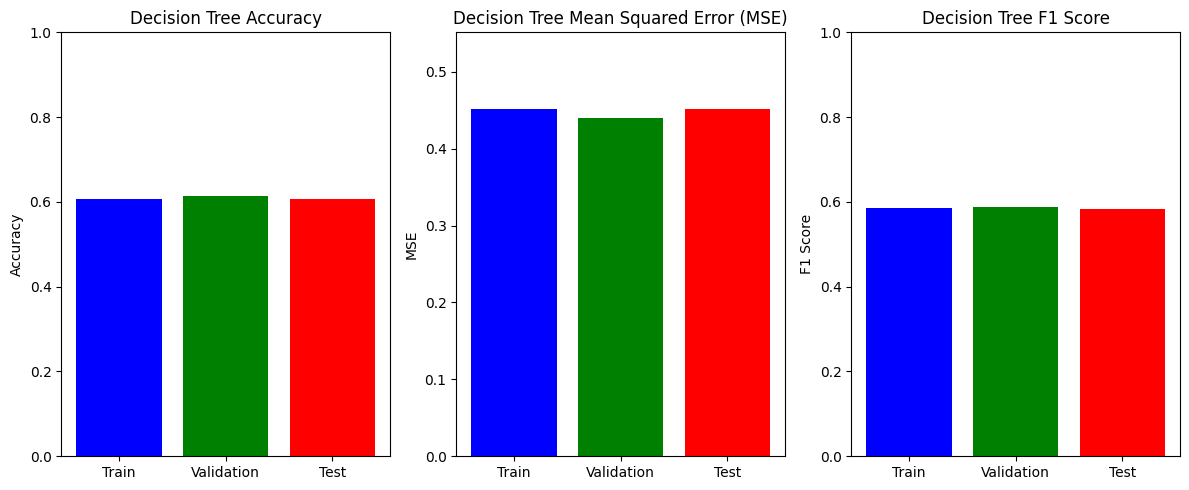

In [14]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions for Decision Tree
y_train_pred_dt = dt_model.predict(X_train)
y_valid_pred_dt = dt_model.predict(X_valid)
y_test_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
valid_accuracy_dt = accuracy_score(y_valid, y_valid_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
valid_mse_dt = mean_squared_error(y_valid, y_valid_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)

# F1 scores for Decision Tree
train_f1_dt = f1_score(y_train, y_train_pred_dt, average='weighted')
valid_f1_dt = f1_score(y_valid, y_valid_pred_dt, average='weighted')
test_f1_dt = f1_score(y_test, y_test_pred_dt, average='weighted')

# Print evaluation metrics for Decision Tree
print(f'Decision Tree - Training MSE: {train_mse_dt}, Accuracy: {train_accuracy_dt * 100:.2f}%, F1: {train_f1_dt:.2f}')
print(f'Decision Tree - Validation MSE: {valid_mse_dt}, Accuracy: {valid_accuracy_dt * 100:.2f}%, F1: {valid_f1_dt:.2f}')
print(f'Decision Tree - Test MSE: {test_mse_dt}, Accuracy: {test_accuracy_dt * 100:.2f}%, F1: {test_f1_dt:.2f}')

# Plotting Decision Tree metrics
labels = ['Train', 'Validation', 'Test']

# Accuracy plot for Decision Tree
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(labels, [train_accuracy_dt, valid_accuracy_dt, test_accuracy_dt], color=['blue', 'green', 'red'])
plt.title('Decision Tree Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# MSE plot for Decision Tree
plt.subplot(1, 3, 2)
plt.bar(labels, [train_mse_dt, valid_mse_dt, test_mse_dt], color=['blue', 'green', 'red'])
plt.title('Decision Tree Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(train_mse_dt, valid_mse_dt, test_mse_dt) + 0.1)

# F1 Score plot for Decision Tree
plt.subplot(1, 3, 3)
plt.bar(labels, [train_f1_dt, valid_f1_dt, test_f1_dt], color=['blue', 'green', 'red'])
plt.title('Decision Tree F1 Score')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

# Display all plots
plt.tight_layout()
plt.show()


Random Forest - Training MSE: 0.4511565510793122, Accuracy: 60.80%, F1: 0.59
Random Forest - Validation MSE: 0.43988603988603986, Accuracy: 61.31%, F1: 0.59
Random Forest - Test MSE: 0.45144319636001706, Accuracy: 60.61%, F1: 0.58


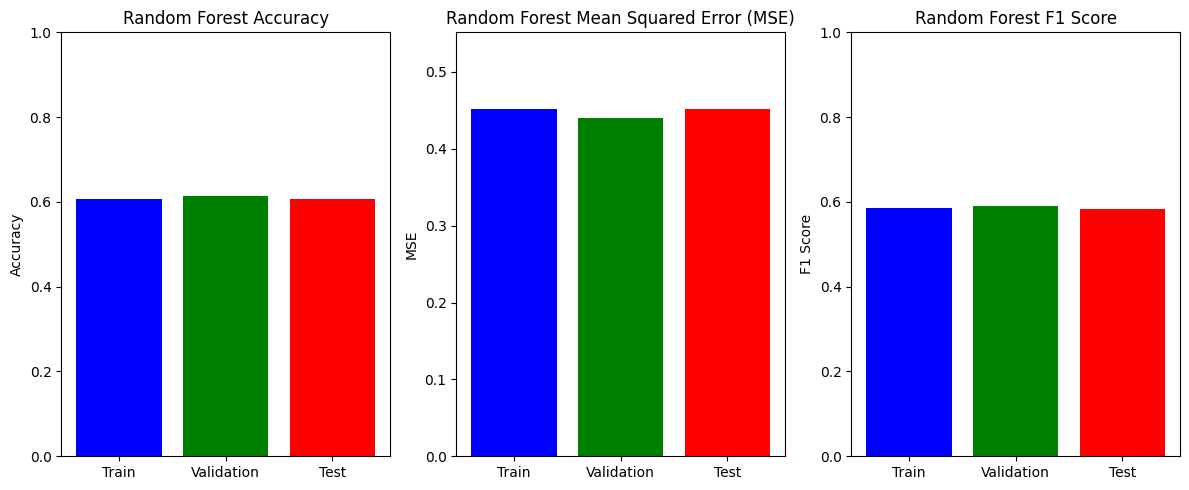

In [15]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions for Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_valid_pred_rf = rf_model.predict(X_valid)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
valid_mse_rf = mean_squared_error(y_valid, y_valid_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

# F1 scores for Random Forest
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')
valid_f1_rf = f1_score(y_valid, y_valid_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

# Print evaluation metrics for Random Forest
print(f'Random Forest - Training MSE: {train_mse_rf}, Accuracy: {train_accuracy_rf * 100:.2f}%, F1: {train_f1_rf:.2f}')
print(f'Random Forest - Validation MSE: {valid_mse_rf}, Accuracy: {valid_accuracy_rf * 100:.2f}%, F1: {valid_f1_rf:.2f}')
print(f'Random Forest - Test MSE: {test_mse_rf}, Accuracy: {test_accuracy_rf * 100:.2f}%, F1: {test_f1_rf:.2f}')

# Plotting Random Forest metrics
labels = ['Train', 'Validation', 'Test']

# Accuracy plot for Random Forest
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(labels, [train_accuracy_rf, valid_accuracy_rf, test_accuracy_rf], color=['blue', 'green', 'red'])
plt.title('Random Forest Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# MSE plot for Random Forest
plt.subplot(1, 3, 2)
plt.bar(labels, [train_mse_rf, valid_mse_rf, test_mse_rf], color=['blue', 'green', 'red'])
plt.title('Random Forest Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(train_mse_rf, valid_mse_rf, test_mse_rf) + 0.1)

# F1 Score plot for Random Forest
plt.subplot(1, 3, 3)
plt.bar(labels, [train_f1_rf, valid_f1_rf, test_f1_rf], color=['blue', 'green', 'red'])
plt.title('Random Forest F1 Score')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

# Display all plots
plt.tight_layout()
plt.show()


Linear Regression - Training MSE: 0.3579928062206893, R2: 0.22, Accuracy: 57.21%, F1: 0.48
Linear Regression - Validation MSE: 0.35518524532492285, R2: 0.23, Accuracy: 57.15%, F1: 0.48
Linear Regression - Test MSE: 0.35444021608726517, R2: 0.21, Accuracy: 58.10%, F1: 0.49


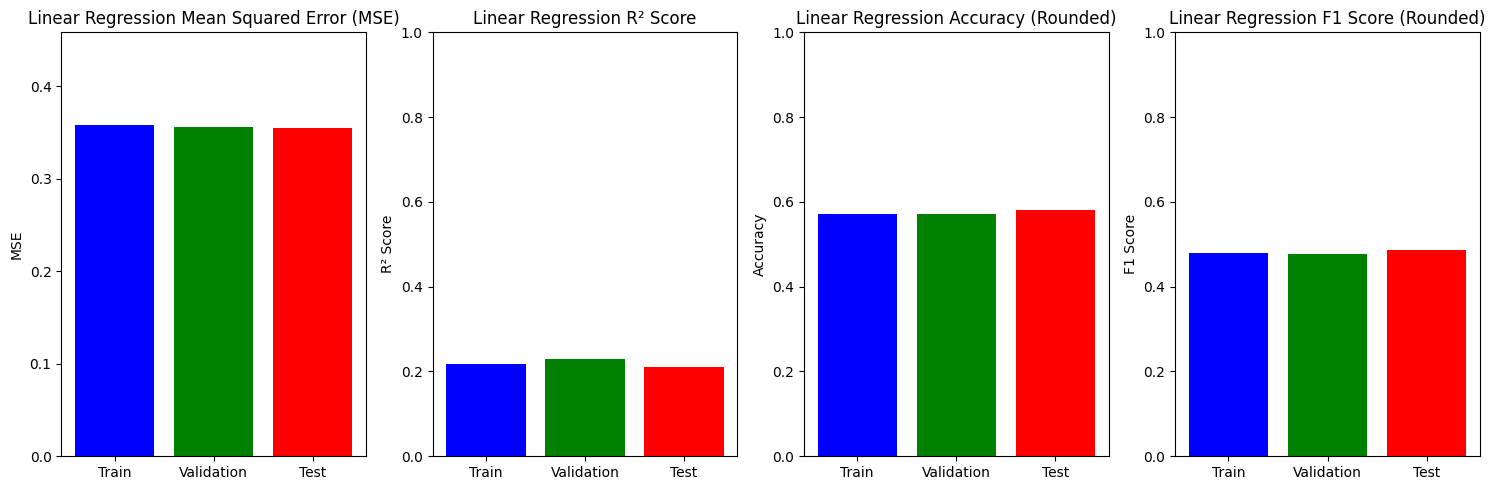

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions for Linear Regression
y_train_pred_lr = lr_model.predict(X_train)
y_valid_pred_lr = lr_model.predict(X_valid)
y_test_pred_lr = lr_model.predict(X_test)

# Since Linear Regression outputs continuous values, round predictions to nearest integer for classification metrics
y_train_pred_lr_class = np.round(y_train_pred_lr).astype(int)
y_valid_pred_lr_class = np.round(y_valid_pred_lr).astype(int)
y_test_pred_lr_class = np.round(y_test_pred_lr).astype(int)

# Evaluate the Linear Regression model with regression and classification metrics
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
valid_mse_lr = mean_squared_error(y_valid, y_valid_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

train_r2_lr = r2_score(y_train, y_train_pred_lr)
valid_r2_lr = r2_score(y_valid, y_valid_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

# Accuracy and F1 score for rounded predictions
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr_class)
valid_accuracy_lr = accuracy_score(y_valid, y_valid_pred_lr_class)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr_class)

train_f1_lr = f1_score(y_train, y_train_pred_lr_class, average='weighted')
valid_f1_lr = f1_score(y_valid, y_valid_pred_lr_class, average='weighted')
test_f1_lr = f1_score(y_test, y_test_pred_lr_class, average='weighted')

# Print evaluation metrics for Linear Regression
print(f'Linear Regression - Training MSE: {train_mse_lr}, R2: {train_r2_lr:.2f}, Accuracy: {train_accuracy_lr * 100:.2f}%, F1: {train_f1_lr:.2f}')
print(f'Linear Regression - Validation MSE: {valid_mse_lr}, R2: {valid_r2_lr:.2f}, Accuracy: {valid_accuracy_lr * 100:.2f}%, F1: {valid_f1_lr:.2f}')
print(f'Linear Regression - Test MSE: {test_mse_lr}, R2: {test_r2_lr:.2f}, Accuracy: {test_accuracy_lr * 100:.2f}%, F1: {test_f1_lr:.2f}')

# Plotting Linear Regression metrics
labels = ['Train', 'Validation', 'Test']

# MSE plot for Linear Regression
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.bar(labels, [train_mse_lr, valid_mse_lr, test_mse_lr], color=['blue', 'green', 'red'])
plt.title('Linear Regression Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(train_mse_lr, valid_mse_lr, test_mse_lr) + 0.1)

# R² plot for Linear Regression
plt.subplot(1, 4, 2)
plt.bar(labels, [train_r2_lr, valid_r2_lr, test_r2_lr], color=['blue', 'green', 'red'])
plt.title('Linear Regression R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)

# Accuracy plot for Linear Regression (Rounded)
plt.subplot(1, 4, 3)
plt.bar(labels, [train_accuracy_lr, valid_accuracy_lr, test_accuracy_lr], color=['blue', 'green', 'red'])
plt.title('Linear Regression Accuracy (Rounded)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# F1 Score plot for Linear Regression (Rounded)
plt.subplot(1, 4, 4)
plt.bar(labels, [train_f1_lr, valid_f1_lr, test_f1_lr], color=['blue', 'green', 'red'])
plt.title('Linear Regression F1 Score (Rounded)')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

# Display all plots
plt.tight_layout()
plt.show()
